<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/ARIMA_Champagne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [2]:
!pip install statsmodels

In [3]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.2 MB/s eta 0:00:00


In [4]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

--2023-11-08 13:31:14--  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598 (1.6K) [text/csv]
Saving to: ‘perrin-freres-monthly-champagne.csv’

perrin-freres-month 100%[===================>]   1.56K  --.-KB/s    in 0s      

2023-11-08 13:31:15 (31.7 MB/s) - ‘perrin-freres-monthly-champagne.csv’ saved [1598/1598]



In [5]:
!head perrin-freres-monthly-champagne.csv

Month,Perrin Freres monthly champagne sales millions ?64-?72
1964-01,2815
1964-02,2672
1964-03,2755
1964-04,2721
1964-05,2946
1964-06,3036
1964-07,2282
1964-08,2212
1964-09,2922


In [6]:
#skipfooter = 2 - skip last two rows
df = pd.read_csv('perrin-freres-monthly-champagne.csv',index_col = 'Month',parse_dates = True)

In [7]:
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 1964-01 to Perrin Freres monthly champagne sales millions ?64-?72
Data columns (total 1 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1)
memory usage: 1.7+ KB


In [9]:
df.tail()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1972-07,4298.0
1972-08,1413.0
1972-09,5877.0
NaN,NaN
Perrin Freres monthly champagne sales millions ?64-?72,NaN


In [10]:
df.dropna(inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 1964-01 to 1972-09
Data columns (total 1 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1)
memory usage: 1.6+ KB


In [12]:
df.columns = ['Sales']

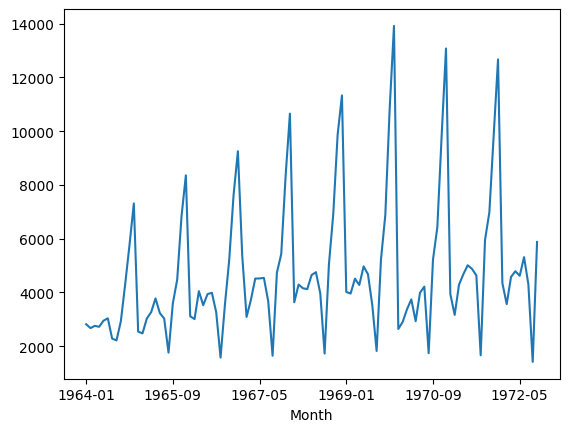

In [14]:
df['Sales'].plot();

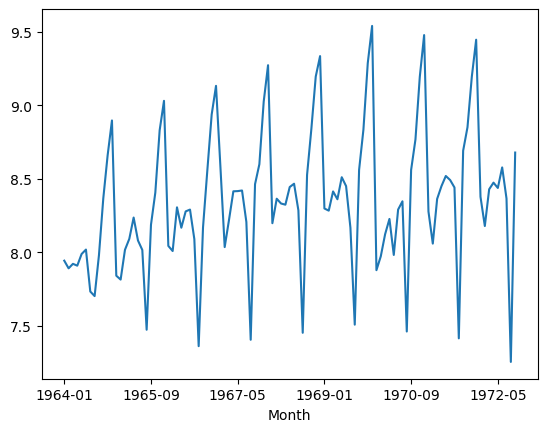

In [15]:
df['LogSales'] = np.log(df['Sales'])
df['LogSales'].plot();

In [16]:
df.index.freq = 'MS'

In [17]:
NTest = 12

train = df.iloc[:-NTest]
test = df.iloc[-NTest:]

In [18]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [19]:
import pmdarima as pm

In [20]:
model = pm.auto_arima(
    train['LogSales'],
    trace = True,
    suppress_warning = True,
    seasonal = True,m = 12
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-50.311, Time=2.14 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-41.975, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-54.968, Time=0.56 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-53.384, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-34.700, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-44.102, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-52.971, Time=1.25 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-52.991, Time=0.85 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-55.117, Time=1.47 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-53.123, Time=1.71 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=2.39 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-50.817, Time=0.37 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-56.122, Time=0.46 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-44.178, Time=0.12 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

In [21]:
#Since the model is seasonal, we won't plot or predict the first 12
train_pred = model.predict_in_sample(start = 12,end = -1)
test_pred,confint = model.predict(n_periods = NTest,return_conf_int = True)

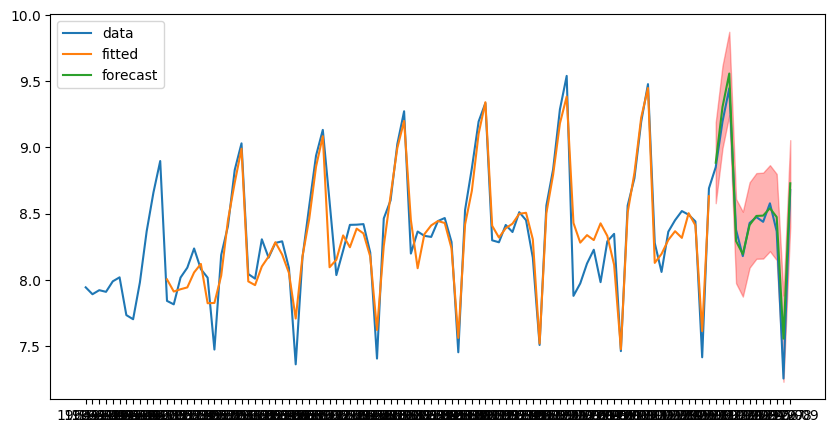

In [24]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(df.index,df['LogSales'],label = 'data')
ax.plot(train.index[12:],train_pred,label = 'fitted')
ax.plot(test.index,test_pred,label = 'forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1], \
                color = 'red',alpha = 0.3)

ax.legend()

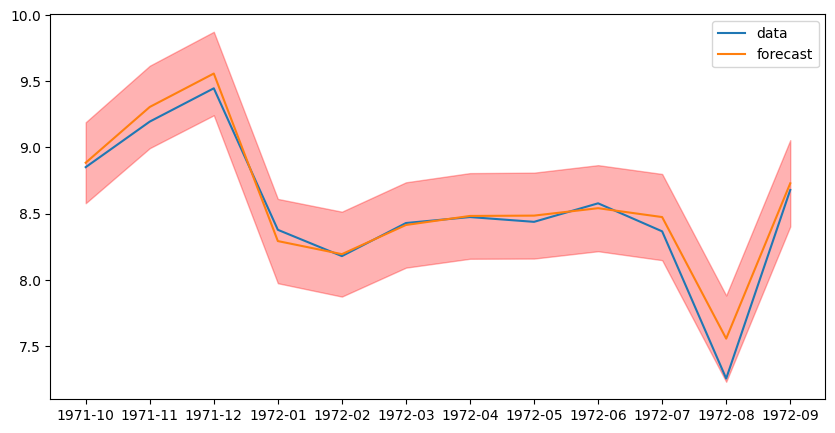

In [26]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(test.index,test['LogSales'],label = 'data')
ax.plot(test.index,test_pred,label = 'forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1], \
                color = 'red',alpha = 0.3)

ax.legend()

In [27]:
r2_score(test['Sales'],np.exp(test_pred))

0.9546864972210554

In [30]:
#Non_seasonal model
model = pm.auto_arima(
    train['LogSales'],
    trace = True,
    stepwise = False,
    suppress_warining=True,
    seasonal = False
    )

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=141.911, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=93.307, Time=0.50 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=141.540, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=139.851, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=138.023, Time=0.10 sec
 ARIM

In [31]:
train_pred = model.predict_in_sample(start = 1,end = -1)
test_pred,confint = model.predict(n_periods = NTest,return_conf_int = True)

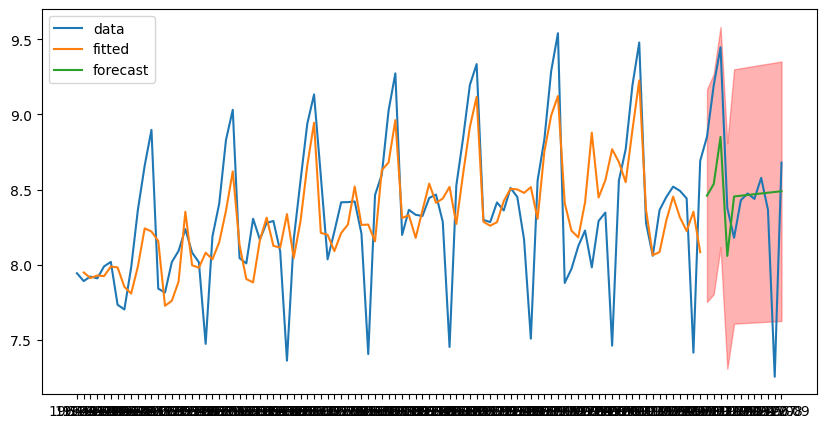

In [35]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(df.index,df['LogSales'],label = 'data')
ax.plot(train.index[1:],train_pred,label = 'fitted')
ax.plot(test.index,test_pred,label = 'forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1], \
                color = 'red',alpha = 0.3)

ax.legend()

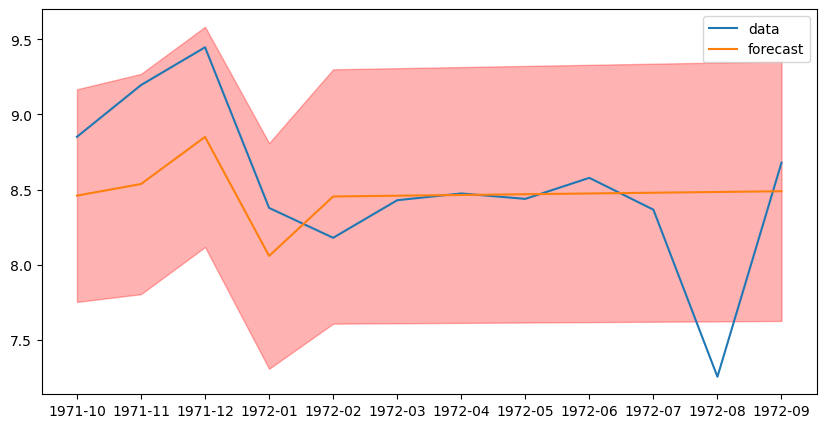

In [37]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(test.index,test['LogSales'],label = 'data')
ax.plot(test.index,test_pred,label = 'forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1], \
                color = 'red',alpha = 0.3)

ax.legend()

In [38]:
r2_score(test['Sales'],test_pred)

-3.9694444005856244